<a href="https://colab.research.google.com/github/marlapinkert/TEWA2/blob/main/03_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Preprocessing

Today's session will cover preprocessing. This will not be needed for your assignments, however, it might be helpful for your master's projects. Preprocessing is one of the most important steps in fMRI data analysis. If the data isn't preprocessed correctly, your results mean nothing. Therefore, this is supposed to serve as an introduction and a starting point for you to be able to learn more on your own.

Normally, you would create your own "workflows" and "pipelines" to preprocess your data. This is too much to cover in only one session. Therefore, I will provide a notebook on GitHub, which should allow you to study this topic yourself (if you are interested).

## Install dependencies and download data

In this notebook we use tools of the [FSL Software Library](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki). Like `dcm2niix`, FSL's tools were designed for command line usage.
Downloading sadly takes a long time (10-20 minutes). When trying this yourself, you will be asked to press enter at some point, so FSL can be installed  to the default location (`usr/local/fsl/`).
**If you do not press enter, the download will not progress!**

In some rare cases, Colab tries to install FSL at another location. If that happens to you, instead of pressing enter, write "usr/local/fsl/" in the cell and then press enter.

Running the cell below on Colab will:
- install nilearn and nipype
- install fsl and [setup required environment variables](https://andysbrainbook.readthedocs.io/en/latest/unix/Unix_04_ShellsVariables.html)

*Important: Once you lose connection to the Colab runtime, you will have to install FSL again (i.e., re-run the cell below). Note that Colab has an idle timeout of 90 minutes. That's one of the downsides of using Colab*

In [1]:
import os

!pip install nilearn
!pip install nipype

!sudo apt -qq install file
!wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
!python fslinstaller.py

fslpath = "/usr/local/fsl"
os.environ["FSLDIR"] = fslpath
os.environ["PATH"] += os.pathsep + os.path.join(fslpath, 'bin')
os.environ["FSLOUTPUTTYPE"] = "NIFTI"
!. ${FSLDIR}/etc/fslconf/fsl.sh
!export FSLDIR PATH

os.environ["LD_LIBRARY_PATH"] = os.environ["LD_LIBRARY_PATH"] + os.pathsep + "/usr/local/fsl"

!flirt -version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.3 MB/s eta 0:00:00
file is already the newest version (1:5.41-3ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
--2023-11-09 08:17:58--  https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
Resolving fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)... 129.67.248.65
Connecting to fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)|129.67.248.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74517 (73K) [applicati

In this notebook, we will use [NYU Slow Flanker dataset](https://openneuro.org/datasets/ds000102/versions/00001) from Openneuro. In this study, healthy adults underwent MRI scanning while performing an event-related [Eriksen Flanker task](https://en.wikipedia.org/wiki/Eriksen_flanker_task).

Running the cell below will download the first three subjects of the dataset. The data will be stored in ```/data```.

In [2]:
# download dataset
!gdown 1YP7UtrbsFCCEYxvuY5D3DMiOh7pXyRWJ
!unzip /content/ds000102.zip -d /data

Downloading...
From: https://drive.google.com/uc?id=1YP7UtrbsFCCEYxvuY5D3DMiOh7pXyRWJ
To: /content/ds000102.zip
100% 204M/204M [00:05<00:00, 38.3MB/s]
Archive:  /content/ds000102.zip
   creating: /data/ds000102/
  inflating: /data/ds000102/task-flanker_bold.json  
  inflating: /data/ds000102/.DS_Store  
  inflating: /data/ds000102/CHANGES  
   creating: /data/ds000102/sub-01/
  inflating: /data/ds000102/README   
  inflating: /data/ds000102/dataset_description.json  
  inflating: /data/ds000102/T1w.json  
  inflating: /data/ds000102/participants.tsv  
   creating: /data/ds000102/sub-02/
   creating: /data/ds000102/sub-03/
  inflating: /data/ds000102/sub-01/.DS_Store  
   creating: /data/ds000102/sub-01/anat/
   creating: /data/ds000102/sub-01/func/
   creating: /data/ds000102/sub-02/anat/
   creating: /data/ds000102/sub-02/func/
   creating: /data/ds000102/sub-03/anat/
   creating: /data/ds000102/sub-03/func/
  inflating: /data/ds000102/sub-01/anat/sub-01_T1w.nii.gz  
  inflating: /dat

## Define parameters

As always, we start with defining some parameters, such as the data and output directory. Also, we will create a variable pointing to the anatomical image of the first subject.

In [3]:
!mkdir /output

data_dir = "/data/ds000102"
output_dir = "/output"

test_subj = "sub-01"
test_anat = f"{data_dir}/{test_subj}/anat/{test_subj}_T1w.nii.gz"

## Nipype Interfaces

Last week we converted some DICOMS to NIfTI files using the Nipype interface of ```dcm2niix```. Now we will have a look at further interfaces.

To recap: interfaces are wrappers that allow Nipype to run programs that are written in programming languages other than Python. For example, we can access the tools of the FSL software library within Python.

### Brain extraction using FSL's ```BET```

Besides the brain, raw MRI images contain non-brain tissue, i.e., skin, muscles, eye balls etc. These non-brain tissues may complicate some automated preprocessing steps such as [brain image segmentation](https://andysbrainbook.readthedocs.io/en/latest/SPM/SPM_Short_Course/SPM_04_Preprocessing/04_SPM_Segmentation.html). Thus, the so called [brain extraction](https://andysbrainbook.readthedocs.io/en/latest/fMRI_Short_Course/Preprocessing/Skull_Stripping.html) or skullstripping is often included as a preliminary step in the preprocessing pipeline, improving speed and accuracy of image segmentation.

To perform skullstripping, FSL offers the [BET (Brain Extraction Tool)](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/BET) which which we will access through its corresponding Nipype interface:

In [5]:
from nipype.interfaces.fsl import BET

In [6]:
BET.help()

Wraps the executable command ``bet``.

FSL BET wrapper for skull stripping

For complete details, see the `BET Documentation.
<https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/BET/UserGuide>`_

Examples
--------
>>> from nipype.interfaces import fsl
>>> btr = fsl.BET()
>>> btr.inputs.in_file = 'structural.nii'
>>> btr.inputs.frac = 0.7
>>> btr.inputs.out_file = 'brain_anat.nii'
>>> btr.cmdline
'bet structural.nii brain_anat.nii -f 0.70'
>>> res = btr.run() # doctest: +SKIP

Inputs::

        [Mandatory]
        in_file: (a pathlike object or string representing an existing file)
                input file to skull strip
                argument: ``%s``, position: 0

        [Optional]
        out_file: (a pathlike object or string representing a file)
                name of output skull stripped image
                argument: ``%s``, position: 1
        outline: (a boolean)
                create surface outline image
                argument: ``-o``
        mask: (a boolean)
                c

Analogous to using the ```dcm2niix``` interface in last week's notebook, we will create an interface object. However, this time we will directly provide the parameters.

(Note from the ```BET.help()``` output above that ```in_file``` is the only mandatory parameter, but here we also want to define the location of the output file (default is the current working directory) and tell nipype to create a [brain mask](http://andysbrainblog.blogspot.com/2012/11/a-note-of-fmri-masks.html) as well)

In [8]:
strip_skull = BET(in_file = test_anat,
                  out_file = f"{output_dir}/{test_subj}_T1w_bet.nii",
                  mask = True)

Now let's run the ```BET``` interface:

In [9]:
result_bet = strip_skull.run()

After running ```BET```, we can have a look at the created output files by calling the ```outputs``` argument of the ``BET`` object:

In [10]:
print(result_bet.outputs)


inskull_mask_file = <undefined>
inskull_mesh_file = <undefined>
mask_file = /output/sub-01_T1w_bet_mask.nii
meshfile = <undefined>
out_file = /output/sub-01_T1w_bet.nii
outline_file = <undefined>
outskin_mask_file = <undefined>
outskin_mesh_file = <undefined>
outskull_mask_file = <undefined>
outskull_mesh_file = <undefined>
skull_file = <undefined>
skull_mask_file = <undefined>



We can use the paths from the ```outputs``` argument to easily access the respective files and plot them:

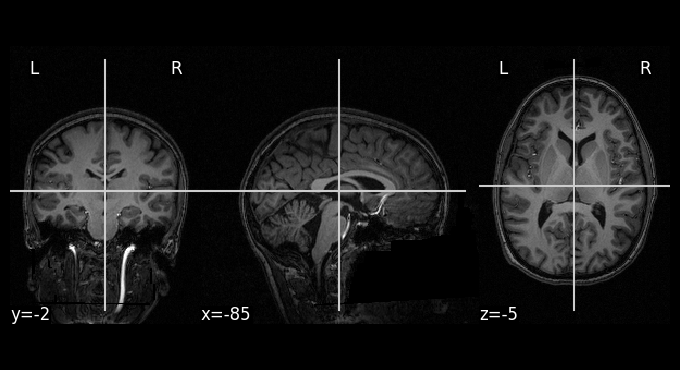

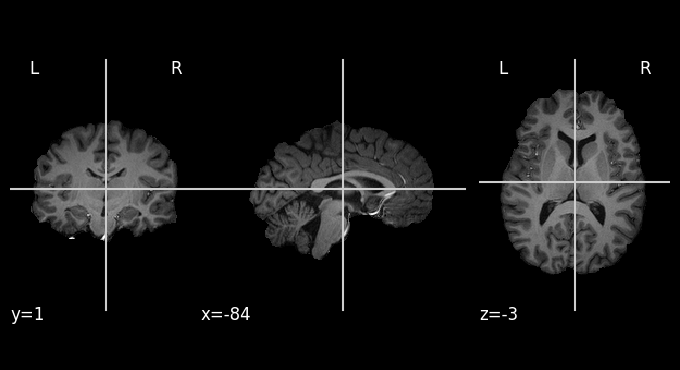

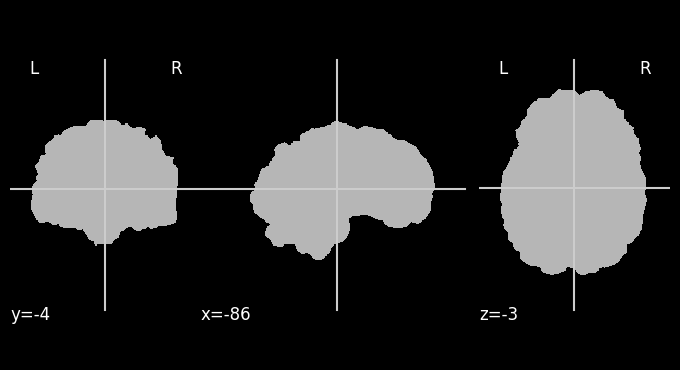

In [11]:
from nilearn import plotting

plotting.plot_anat(test_anat, dim=-1)                                           # set dim=-1 to increase contrast
plotting.plot_anat(result_bet.outputs.out_file, dim=-1)
plotting.plot_anat(result_bet.outputs.mask_file)

## instead of using the outputs argument we can also directly provide the respective path:
# plotting.plot_anat("/output/sub-01_T1w_bet.nii")

Nilearn's plotting module also allows us to outline the brain mask on top of the non-skullstripped anatomical image. This is useful to determine how well the brain extraction worked.

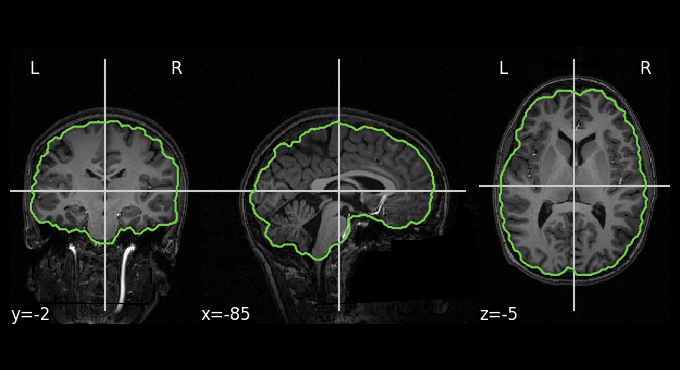

In [13]:
disp_anat = plotting.plot_anat(test_anat, dim=-1)
disp_anat.add_contours(result_bet.outputs.mask_file, levels=[0.8])

### Brain segmentation using FSL's ```FAST```

Put simply, [segmentation](https://andysbrainbook.readthedocs.io/en/latest/SPM/SPM_Short_Course/SPM_04_Preprocessing/04_SPM_Segmentation.html) is all about learning which voxels belong to which tissue type (i.e., grey matter, white matter and cerebrospinal fluid (CSF)). This information can aid further steps down the preprocessing pipeline such as normalizing the image to standard space.

Various neuroimaging software suites provide functionalities to perform segmentation. Here, we will use FSL's [```FAST```](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FAST) tool as we have FSL already installed.

In [14]:
from nipype.interfaces.fsl import FAST

FAST.help()

Wraps the executable command ``fast``.

FSL FAST wrapper for segmentation and bias correction

For complete details, see the `FAST Documentation.
<https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FAST>`_

Examples
--------
>>> from nipype.interfaces import fsl
>>> fastr = fsl.FAST()
>>> fastr.inputs.in_files = 'structural.nii'
>>> fastr.inputs.out_basename = 'fast_'
>>> fastr.cmdline
'fast -o fast_ -S 1 structural.nii'
>>> out = fastr.run()  # doctest: +SKIP

Inputs::

        [Mandatory]
        in_files: (a list of items which are a pathlike object or string
                  representing an existing file)
                image, or multi-channel set of images, to be segmented
                argument: ``%s``, position: -1

        [Optional]
        out_basename: (a pathlike object or string representing a file)
                base name of output files
                argument: ``-o %s``
        number_classes: (1 <= an integer <= 10)
                number of tissue-type classes
            

In [15]:
segment = FAST(in_files= f"/output/{test_subj}_T1w_bet.nii")

In [16]:
print(f"/output/{test_subj}_T1w_bet.nii")

/output/sub-01_T1w_bet.nii


Running FAST takes a while - sometimes up to ~6 minutes.

In [17]:
segment.run()

Let's have a look at the three partial volume files that have been created. These files represent the tissue types that have been segmented (i.e., Grey Matter, White Matter and CSF). According to the [FSL documentation](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FAST) "*each voxel contains a value in the range 0-1 that represents the proportion of that class's tissue present in that voxel*".

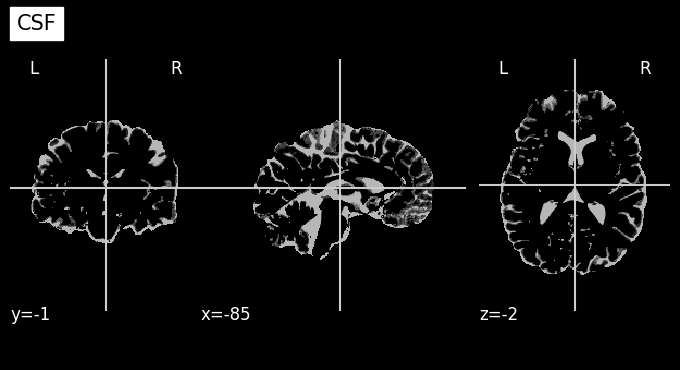

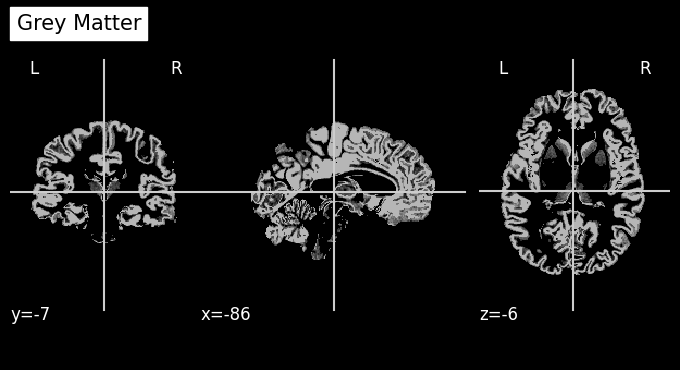

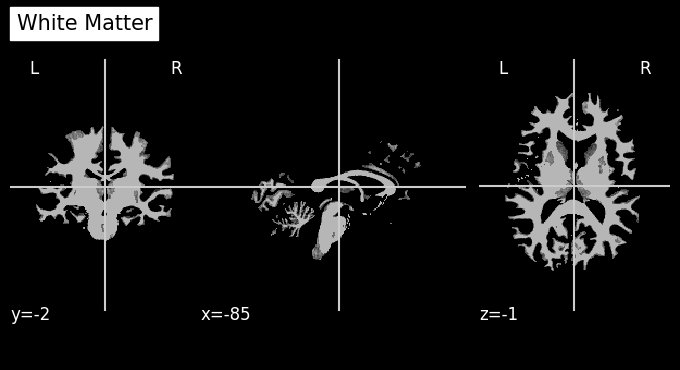

In [18]:
plot_labels = {0: "CSF", 1: "Grey Matter", 2: "White Matter"}

for i, label in plot_labels.items():
  plotting.plot_anat(f"/output/sub-01_T1w_bet_pve_{i}.nii",
                     title = label)

We can also plot the extracted brain overlayed with contours of their gray matter:

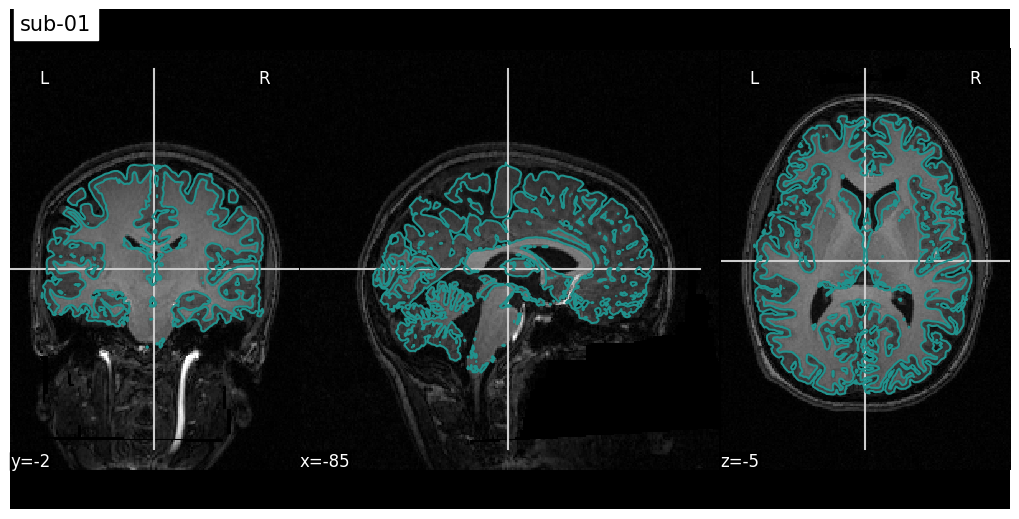

In [19]:
from nilearn import plotting
import matplotlib.pyplot as plt

t1_raw = f"{data_dir}/{test_subj}/anat/{test_subj}_T1w.nii.gz"
mask = f"/output/{test_subj}_T1w_bet_pve_1.nii"

fig = plt.figure(figsize=(10,5))

disp = plotting.plot_anat(t1_raw, dim = -1, title = test_subj, figure = fig)
disp.add_contours(mask, levels=[0.5])




## Exercise

In this notebook, we illustrated preprocessing only on the anatomical image. This exercise includes the first steps of the preprocessing of the functional image. The exact steps are:

- Setup an interface for slicetime correction (using [```SliceTimer```](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.fsl.preprocess.html#slicetimer))
  - Use ```/data/ds000102/sub-01/func/sub-01_task-flanker_run-1_bold.nii.gz``` as the input file
  - Specify the path of the output file as: `/output/sub-01_task-flanker_run-1_bold_st.nii`
  - You will need the Repitition Time (TR): You can find it by inspecting the ```task-flanker_bold.json``` file in the data directory
  - Assume interleaved slice acquisition
- Setup an interface for motion correction (using [```MCFLIRT```](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.fsl.preprocess.html#mcflirt))
  - Use the output file of the slicetime correction (`/output/sub-01_task-flanker_run-1_bold_st.nii`) as the input file
  - Specify the path of the output file as: `/output/sub-01_task-flanker_run-1_bold_st_mcf.nii`
  - Save transformation (motion) parameters


  Tips:
  - To find out how to specify the arguments, try `SliceTimer.help()` and `MCFLIRT.help()`
  - To check whether you specified the correct arguments in your interface, try `name_of_your_interface.cmdline`



In [22]:
func_img = f"{data_dir}/{test_subj}/func/{test_subj}_task-flanker_run-1_bold.nii.gz"

In [23]:
from nipype.interfaces.fsl import SliceTimer, MCFLIRT

# instantiate interface object slicetimer
slicetimer = SliceTimer(in_file = func_img,
                        out_file = f"{output_dir}/{test_subj}_task-flanker_run-1_bold_st.nii",
                        time_repetition = 2.0,
                        interleaved = True)



In [24]:
slicetimer.run()

In [25]:
# instantiate interface object realigner
realigner = MCFLIRT(in_file = f"{output_dir}/{test_subj}_task-flanker_run-1_bold_st.nii",
                    out_file = f"{output_dir}/{test_subj}_task-flanker_run-1_bold_st_mcf.nii",
                    save_plots = True)


In [26]:
realigner.run()

Below are two other options to look at the json file!

In [20]:
!cat "/data/ds000102/task-flanker_bold.json"

{
	"RepetitionTime": 2.0,
	"TaskName": "Flanker",
	"TaskDescription": "On each trial (inter-trial interval (ITI) varied between 8 s and 14 s; mean ITI=12 s),participants used one of two buttons on a response pad to indicate the direction of a central arrow in an array of 5 arrows. In congruent trials the flanking arrows pointed in the same direction as the central arrow (e.g., < < < < <), while in more demanding incongruent trials the flanking arrows pointed in the opposite direction (e.g., < < > < <). Subjects performed two 5-minute blocks, each containing 12 congruent and 12 incongruent trials, presented in a pseudorandom order.",
	"CogAtlasID": "tsk_4a57abb949a4f",
	"Manufacturer": "Siemens",
	"ManufacturerModelName": "Allegra",
	"MagneticFieldStrength": 3.0,
	"ScanningSequence": "Echo Planar",
	"MRAcquisitionType": "2D",
	"EchoTime": 0.030,
	"FlipAngle": 80.0
}


In [21]:
import json
with open(f"/data/ds000102/task-flanker_bold.json") as f:
   data = json.load(f)

print(data)

{'RepetitionTime': 2.0, 'TaskName': 'Flanker', 'TaskDescription': 'On each trial (inter-trial interval (ITI) varied between 8 s and 14 s; mean ITI=12 s),participants used one of two buttons on a response pad to indicate the direction of a central arrow in an array of 5 arrows. In congruent trials the flanking arrows pointed in the same direction as the central arrow (e.g., < < < < <), while in more demanding incongruent trials the flanking arrows pointed in the opposite direction (e.g., < < > < <). Subjects performed two 5-minute blocks, each containing 12 congruent and 12 incongruent trials, presented in a pseudorandom order.', 'CogAtlasID': 'tsk_4a57abb949a4f', 'Manufacturer': 'Siemens', 'ManufacturerModelName': 'Allegra', 'MagneticFieldStrength': 3.0, 'ScanningSequence': 'Echo Planar', 'MRAcquisitionType': '2D', 'EchoTime': 0.03, 'FlipAngle': 80.0}
